# Pytrad

In [1]:
linux = True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
import os

module_path = os.path.abspath(os.path.join('..'))

if linux:
    if module_path not in sys.path:
        sys.path.append(module_path+"/DataPreprocessing")
else:
    if module_path not in sys.path:
        sys.path.append(module_path+"\\DataPreprocessing")

## Data Preprocessing

In [3]:
if linux:
    # lab computers
    data_dir = "/home/dhanalaxmi.gaddam/ml703_timeSeriesCausalDiscovery/datasets/"
else:
    data_dir = "C:/Users/diego/iCloudDrive/Documents/MBZUAI Sem/Semester 2/ML703 Probabilistic and Statistical Inference/Project/JN/Datasets/"

company = pd.read_csv(data_dir + "Company.csv")
companyValues = pd.read_csv(data_dir + "CompanyValues.csv")
companyTweet = pd.read_csv(data_dir + "Company_Tweet.csv")
tweet = pd.read_csv(data_dir + "Tweet.csv")
tweet = tweet.merge(companyTweet, on="tweet_id", how='inner')

In [4]:
print(f"Stocks from {company.ticker_symbol.unique()}")

selected_stock = 'TSLA'
print(f"Stock selected: {selected_stock}")
companyValuesSub = companyValues[companyValues.ticker_symbol == selected_stock]
tweetSub = tweet[tweet.ticker_symbol == selected_stock]

Stocks from ['AAPL' 'GOOG' 'GOOGL' 'AMZN' 'TSLA' 'MSFT']
Stock selected: TSLA


In [5]:
print(f"Company values: \n{companyValuesSub.head(3)}")
print(f"Company tweets: \n{tweetSub.head(3)}")

Company values: 
      ticker_symbol    day_date  close_value    volume  open_value  \
14463          TSLA  2020-05-29       835.00  11812490      808.75   
14464          TSLA  2020-05-28       805.81   7275774      813.51   
14465          TSLA  2020-05-27       820.23  11549530      820.86   

       high_value  low_value  
14463      835.00     804.21  
14464      824.75     801.69  
14465      827.71     785.00  
Company tweets: 
             tweet_id         writer   post_date  \
3  550442977802207232   ShowDreamCar  1420070807   
5  550443807834402816   i_Know_First  1420071005   
7  550443808606126081  aaplstocknews  1420071005   

                                                body  comment_num  \
3  $GM $TSLA: Volkswagen Pushes 2014 Record Recal...            0   
5  Swing Trading: Up To 8.91% Return In 14 Days h...            0   
7  Swing Trading: Up To 8.91% Return In 14 Days h...            0   

   retweet_num  like_num ticker_symbol  
3            0         1          

## One Company Analysis

### Tweet data preprocessing

In [6]:
from data import set_datetime, detrend_ts
from pandas.tseries.offsets import BDay

## Remove weekend values since the stock price is not given for these days
tweetSub['date'] = set_datetime(tweetSub.post_date)
isBusinessDay = BDay().onOffset

isBusinessDay
match_series = pd.to_datetime(tweetSub['date']).map(isBusinessDay)
tweetSub = tweetSub[match_series]

tweetSubMetrics = tweetSub[['date', 'comment_num', 'retweet_num', 'like_num']]
tweetSubMetrics = tweetSubMetrics.groupby(["date"]).sum()

# 2019 year period
tweetSubMetrics2019 = tweetSubMetrics[(tweetSubMetrics.index >= pd.to_datetime("2018/12/25")) \
    & (tweetSubMetrics.index <= pd.to_datetime("2019/12/31"))]

# 2015 - 2019 year period
tweetSubMetrics1519 = tweetSubMetrics[(tweetSubMetrics.index >= pd.to_datetime("2015/01/01")) \
    & (tweetSubMetrics.index <= pd.to_datetime("2019/12/31"))]

print(tweetSubMetrics1519.shape)
tweetSubMetrics1519.head(5)

<ipython-input-6-35bd3153e489>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetSub['date'] = set_datetime(tweetSub.post_date)
/home/dhanalaxmi.gaddam/.conda/envs/trad/lib/python3.8/site-packages/pandas/core/base.py:870: FutureWarning: onOffset is a deprecated, use is_on_offset instead
  new_values = map_f(values, mapper)


(1304, 3)


/home/dhanalaxmi.gaddam/.conda/envs/trad/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,comment_num,retweet_num,like_num
date,,,
2015-01-01,19,40,81
2015-01-02,47,53,142
2015-01-05,21,75,191
2015-01-06,24,42,162
2015-01-07,13,62,202


In [7]:
tweetSubMetrics1519['log_retweet_num'] = np.log(tweetSubMetrics1519['retweet_num'])
tweetSubMetrics1519['log_comment_num'] = np.log(tweetSubMetrics1519['comment_num'])

tweetSubMetrics1519['detrended_log_retweet_num'] = detrend_ts(tweetSubMetrics1519.log_retweet_num)
tweetSubMetrics1519['detrended_log_comment_num'] = detrend_ts(tweetSubMetrics1519.log_comment_num)

# tweetSubMetrics1519 = tweetSubMetrics1519[-365:]

<ipython-input-7-8d3a3a0914bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetSubMetrics1519['log_retweet_num'] = np.log(tweetSubMetrics1519['retweet_num'])
<ipython-input-7-8d3a3a0914bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetSubMetrics1519['log_comment_num'] = np.log(tweetSubMetrics1519['comment_num'])
<ipython-input-7-8d3a3a0914bb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

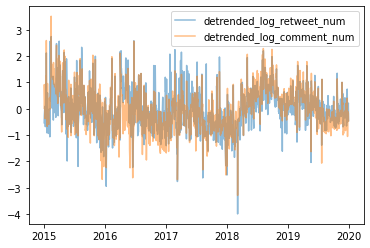

In [8]:
plt.plot(tweetSubMetrics1519.detrended_log_retweet_num, alpha=0.5, label="detrended_log_retweet_num")
plt.plot(tweetSubMetrics1519.detrended_log_comment_num, alpha=0.5, label="detrended_log_comment_num")
plt.legend()

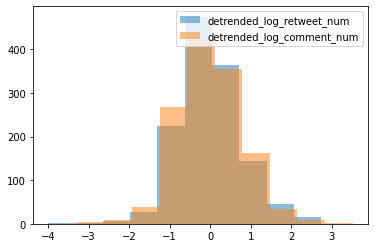

In [9]:
plt.hist(tweetSubMetrics1519.detrended_log_retweet_num, alpha=0.5, label="detrended_log_retweet_num")
plt.hist(tweetSubMetrics1519.detrended_log_comment_num, alpha=0.5, label="detrended_log_comment_num")
plt.legend()

In [10]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(tweetSubMetrics1519.detrended_log_retweet_num)
print('Detrended Log Retweet Number test:')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

result = adfuller(tweetSubMetrics1519.detrended_log_comment_num)
print('Detrended Log Tweet Comment Number test:')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Detrended Log Retweet Number test:
ADF Statistic: -6.260720
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Detrended Log Tweet Comment Number test:
ADF Statistic: -3.224855
p-value: 0.018590
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


### Value data preprocessing

In [11]:
from pandas.tseries.offsets import BDay

## Remove weekend values since the stock price is not given for these days
companyValuesSub['date'] = pd.to_datetime(companyValuesSub['day_date']).dt.date
isBusinessDay = BDay().onOffset

isBusinessDay
match_series = pd.to_datetime(companyValuesSub['date']).map(isBusinessDay)
companyValuesSub = companyValuesSub[match_series]

companyValuesSubMetrics = companyValuesSub[['date', 'close_value', 'volume', 'open_value', 'high_value', 'low_value']]
companyValuesSubMetrics = companyValuesSubMetrics.groupby(['date']).sum()

# 2019 year period
companyValuesSubMetrics2019 = companyValuesSubMetrics[(companyValuesSubMetrics.index >= pd.to_datetime("2018/12/25")) \
    & (companyValuesSubMetrics.index <= pd.to_datetime("2019/12/31"))]

# 2015 - 2019 year period
companyValuesSubMetrics1519 = companyValuesSubMetrics[(companyValuesSubMetrics.index >= pd.to_datetime("2014/12/31")) \
    & (companyValuesSubMetrics.index <= pd.to_datetime("2019/12/31"))]


print(companyValuesSubMetrics1519.shape)
companyValuesSubMetrics1519.head(3)

(1305, 5)


<ipython-input-11-ec8df3942984>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  companyValuesSub['date'] = pd.to_datetime(companyValuesSub['day_date']).dt.date
/home/dhanalaxmi.gaddam/.conda/envs/trad/lib/python3.8/site-packages/pandas/core/base.py:870: FutureWarning: onOffset is a deprecated, use is_on_offset instead
  new_values = map_f(values, mapper)
/home/dhanalaxmi.gaddam/.conda/envs/trad/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,close_value,volume,open_value,high_value,low_value
date,,,,,
2014-12-31,222.41,2392947,223.09,225.68,222.25
2015-01-01,222.41,2392947,223.09,225.68,222.25
2015-01-02,219.31,4753239,222.87,223.25,213.26


<ipython-input-12-f96fe32b4bbe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  companyValuesSubMetrics1519['log_close_value'] = np.log(companyValuesSubMetrics1519['close_value'])
/home/dhanalaxmi.gaddam/ml703_timeSeriesCausalDiscovery/DataPreprocessing/data.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[lag_column] = temp[-final_ts_len:]


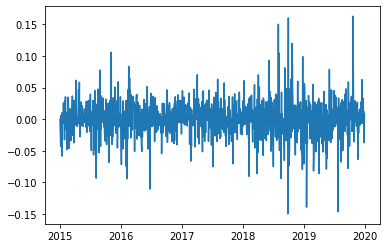

In [12]:
from data import set_datetime, detrend_ts, take_diff_ts

companyValuesSubMetrics1519['log_close_value'] = np.log(companyValuesSubMetrics1519['close_value'])

companyValuesSubMetrics1519 = take_diff_ts(data=companyValuesSubMetrics1519, \
    ts_column='log_close_value', lag_column='lag_log_close_value', lag=1, final_ts_len=companyValuesSubMetrics1519.shape[0] - 1)

plt.plot(companyValuesSubMetrics1519.lag_log_close_value)

(array([  3.,   5.,  26., 142., 637., 416.,  59.,  10.,   3.,   3.]),
 array([-0.1496786 , -0.11844   , -0.0872014 , -0.05596281, -0.02472421,
         0.00651439,  0.03775299,  0.06899159,  0.10023019,  0.13146879,
         0.16270738]),
 <BarContainer object of 10 artists>)

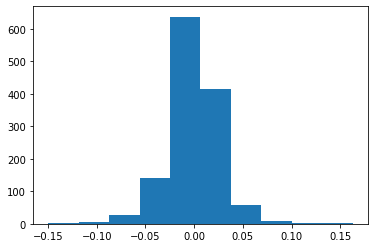

In [13]:
plt.hist(companyValuesSubMetrics1519.lag_log_close_value)

In [14]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(companyValuesSubMetrics1519.lag_log_close_value)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -35.906313
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [15]:
dataFrame = np.column_stack((companyValuesSubMetrics1519.lag_log_close_value,
                    tweetSubMetrics1519.detrended_log_retweet_num[-1304:],
                    tweetSubMetrics1519.detrended_log_comment_num[-1304:]))
dataFrame[:5]

array([[ 0.        , -0.53468426,  0.01710925],
       [-0.01403627, -0.25577475,  0.9193793 ],
       [-0.04295024,  0.0889185 ,  0.11031555],
       [ 0.00564826, -0.49340294,  0.24040837],
       [-0.00156313, -0.10644112, -0.37613468]])

Text(0, 0.5, 'detrended_log_retweet_num')

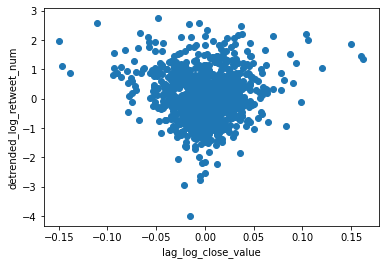

In [16]:
plt.scatter(dataFrame[:, 0], dataFrame[:, 1])
plt.xlabel("lag_log_close_value")
plt.ylabel("detrended_log_retweet_num")

Text(0, 0.5, 'detrended_log_comment_num')

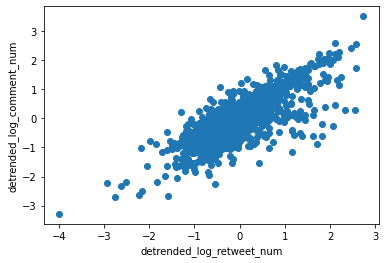

In [17]:
plt.scatter(dataFrame[:, 1], dataFrame[:, 2])
plt.xlabel("detrended_log_retweet_num")
plt.ylabel("detrended_log_comment_num")

### Causal Discovery - Constrained based

#### PC

In [18]:
from pytrad.search.ConstraintBased import PC
from pytrad.utils.cit import fisherz, chisq, gsq, mv_fisherz, kci ## Conditional Independence test

cg = PC.pc(data=dataFrame, alpha=0.05, indep_test=fisherz, stable=False, uc_rule=0, uc_priority=-1)

0 ind 1 | () with p-value 0.362678

0 ind 2 | () with p-value 0.086019



In [19]:
from pytrad.search.ConstraintBased import PC
from pytrad.utils.cit import fisherz, chisq, gsq, mv_fisherz, kci ## Conditional Independence test

cg = PC.pc(data=dataFrame, alpha=0.05, indep_test=fisherz, 
            stable=True, uc_rule=0, uc_priority=-1)

0 ind 1 | () with p-value 0.362678

0 ind 2 | () with p-value 0.086019

1 ind 0 | () with p-value 0.362678

2 ind 0 | () with p-value 0.086019



#### FCI

In [36]:
from pytrad.search.ConstraintBased.FCI import fci, mod_endpoint
from pytrad.utils.GraphUtils import GraphUtils

G = fci(dataFrame, fisherz, 0.05, verbose=True)

pgv_g = GraphUtils.to_pgv(G)
print(pgv_g)
#pgv_g.draw('./FCI/tsla_test.jpeg', prog='dot', format='jpeg')

phase1 remove X1 --- X2 by sepset () pval:0.36267842954352525
phase1 remove X1 --- X3 by sepset () pval:0.0860188625485947
strict digraph "" {
	graph [labelfontsize=18];
	node [label="\N"];
	0	[label=X1];
	1	[label=X2];
	2	[label=X3];
	1 -> 2	[arrowhead=odot,
		arrowtail=odot,
		dir=both];
}



## All Companies Analysis

#### Tweet data preprocessing

In [41]:
from data import set_datetime, detrend_ts
from pandas.tseries.offsets import BDay

## Remove weekend values since the stock price is not given for these days
tweet['date'] = set_datetime(tweet.post_date)
isBusinessDay = BDay().onOffset

isBusinessDay
match_series = pd.to_datetime(tweet['date']).map(isBusinessDay)
tweetWD = tweet[match_series]

tweetMetrics = tweetWD[['ticker_symbol', 'date', 'comment_num', 'retweet_num', 'like_num']]
tweetMetrics = tweetMetrics.groupby(["ticker_symbol", "date"]).sum().reset_index()
tweetMetrics = tweetMetrics.pivot(index='date', columns=['ticker_symbol'])
tweetMetrics.columns = ["_".join(col) for col in tweetMetrics.columns]


# 2019 year period
tweetMetrics2019 = tweetMetrics[(tweetMetrics.index >= pd.to_datetime("2018/12/25")) \
    & (tweetMetrics.index <= pd.to_datetime("2019/12/31"))]

# 2015 - 2019 year period
tweetMetrics1519 = tweetMetrics[(tweetMetrics.index >= pd.to_datetime("2014/12/31")) \
    & (tweetMetrics.index <= pd.to_datetime("2019/12/31"))]

print(tweetMetrics1519.shape)
tweetMetrics1519.head(3)

/home/dhanalaxmi.gaddam/.conda/envs/trad/lib/python3.8/site-packages/pandas/core/base.py:870: FutureWarning: onOffset is a deprecated, use is_on_offset instead
  new_values = map_f(values, mapper)


(1304, 18)


/home/dhanalaxmi.gaddam/.conda/envs/trad/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,comment_num_AAPL,comment_num_AMZN,comment_num_GOOG,comment_num_GOOGL,comment_num_MSFT,comment_num_TSLA,retweet_num_AAPL,retweet_num_AMZN,retweet_num_GOOG,retweet_num_GOOGL,retweet_num_MSFT,retweet_num_TSLA,like_num_AAPL,like_num_AMZN,like_num_GOOG,like_num_GOOGL,like_num_MSFT,like_num_TSLA
date,,,,,,,,,,,,,,,,,,
2015-01-01,17,44,0,0,1,19,968,699,11,3,19,40,227,188,21,27,49,81
2015-01-02,128,11,9,5,6,47,2102,370,24,10,2,53,562,89,50,29,27,142
2015-01-05,139,15,18,9,15,21,392,52,62,41,69,75,554,123,143,96,93,191


In [42]:
for col in tweetMetrics1519.columns:
    print(f"Processing {col}")
    if sum(tweetMetrics1519[col] == 0) > 0:
        tweetMetrics1519[f'sqrt_{col}'] = np.sqrt(tweetMetrics1519[col])
        tweetMetrics1519[f'detrended_sqrt_{col}'] = detrend_ts(tweetMetrics1519[f'sqrt_{col}'])
    else:
        tweetMetrics1519[f'log_{col}'] = np.log(tweetMetrics1519[col])
        tweetMetrics1519[f'detrended_log_{col}'] = detrend_ts(tweetMetrics1519[f'log_{col}'])

tweetMetrics1519 = tweetMetrics1519[-1304:]

Processing comment_num_AAPL
Processing comment_num_AMZN
Processing comment_num_GOOG
Processing comment_num_GOOGL
Processing comment_num_MSFT
Processing comment_num_TSLA
Processing retweet_num_AAPL
Processing retweet_num_AMZN
Processing retweet_num_GOOG
Processing retweet_num_GOOGL
Processing retweet_num_MSFT
Processing retweet_num_TSLA
Processing like_num_AAPL
Processing like_num_AMZN
Processing like_num_GOOG
Processing like_num_GOOGL
Processing like_num_MSFT
Processing like_num_TSLA


<ipython-input-42-1046dfc97ed9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetMetrics1519[f'sqrt_{col}'] = np.sqrt(tweetMetrics1519[col])
<ipython-input-42-1046dfc97ed9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetMetrics1519[f'detrended_sqrt_{col}'] = detrend_ts(tweetMetrics1519[f'sqrt_{col}'])
<ipython-input-42-1046dfc97ed9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [43]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import zivot_andrews

stationary_cols = []

for col in tweetMetrics1519.columns:
    adf_result = adfuller(tweetMetrics1519[col])
    print(f'{col.upper()} test:')
    print(f'ADF Statistic: {adf_result[0]}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print('\t%s: %.3f' % (key, value))
    print('p-value: %f' % adf_result[1])
    print("Non-Stationary") if adf_result[1] > 0.05 else print("Stationary")
    
    # t_stat, p_value, critical_values, _, _ = zivot_andrews(stationary_with_break[0].values)
    za_result = zivot_andrews(tweetMetrics1519[col])
    print(f'Zivot-Andrews Statistic: {za_result[0]:.2f}')
    for key, value in za_result[2].items():
        print('Critial Values:')
        print(f'   {key}, {value:.2f}')
    print(f'\np-value: {za_result[1]:.2f}')
    print("Non-Stationary") if za_result[1] > 0.05 else print("Stationary")

    if (adf_result[1] < 0.05) & (za_result[1] < 0.05):
        stationary_cols.append(col)

len(stationary_cols)

COMMENT_NUM_AAPL test:
ADF Statistic: -5.655036807902873
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
p-value: 0.000001
Stationary
Zivot-Andrews Statistic: -7.28
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.00
Stationary
COMMENT_NUM_AMZN test:
ADF Statistic: -3.308320956067472
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
p-value: 0.014511
Stationary
Zivot-Andrews Statistic: -7.44
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.00
Stationary
COMMENT_NUM_GOOG test:
ADF Statistic: -15.769026136090748
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
p-value: 0.000000
Stationary
Zivot-Andrews Statistic: -16.51
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.00
Stationary
COMMENT_NUM_GOOGL test:
ADF Statistic: -8.019091001078179
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
p-value: 0.000000
Stationary
Zi

Zivot-Andrews Statistic: -5.35
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.01
Stationary
DETRENDED_LOG_COMMENT_NUM_TSLA test:
ADF Statistic: -3.2248553399649227
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
p-value: 0.018590
Stationary
Zivot-Andrews Statistic: -5.35
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.01
Stationary
LOG_RETWEET_NUM_AAPL test:
ADF Statistic: -9.068199057759161
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
p-value: 0.000000
Stationary
Zivot-Andrews Statistic: -14.83
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.00
Stationary
DETRENDED_LOG_RETWEET_NUM_AAPL test:
ADF Statistic: -14.565409276754517
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
p-value: 0.000000
Stationary
Zivot-Andrews Statistic: -14.83
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   1

45

In [44]:
selected_stationary_cols = stationary_cols[5:10]
selected_stationary_cols.append('detrended_log_retweet_num_TSLA')
selected_stationary_cols

['retweet_num_AAPL',
 'retweet_num_AMZN',
 'retweet_num_GOOG',
 'retweet_num_GOOGL',
 'retweet_num_MSFT',
 'detrended_log_retweet_num_TSLA']

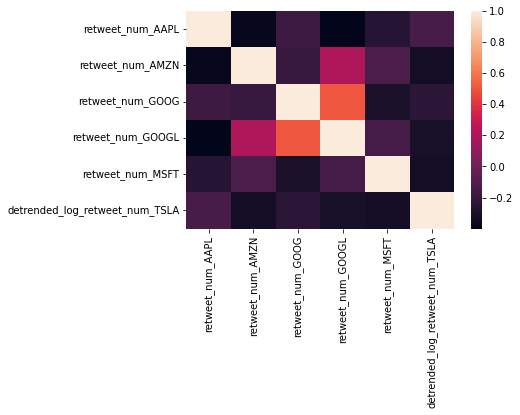

In [48]:
import seaborn as sn

# Correlation between Stationary variables
corrMatrix = tweetMetrics1519[selected_stationary_cols].corr().corr()
sn.heatmap(corrMatrix, annot=False)
plt.show()


In [49]:
abs(corrMatrix[:]) > 0.75

,retweet_num_AAPL,retweet_num_AMZN,retweet_num_GOOG,retweet_num_GOOGL,retweet_num_MSFT,detrended_log_retweet_num_TSLA
retweet_num_AAPL,True,False,False,False,False,False
retweet_num_AMZN,False,True,False,False,False,False
retweet_num_GOOG,False,False,True,False,False,False
retweet_num_GOOGL,False,False,False,True,False,False
retweet_num_MSFT,False,False,False,False,True,False
detrended_log_retweet_num_TSLA,False,False,False,False,False,True


In [50]:
tweetMetricsFinal = tweetMetrics1519[selected_stationary_cols]

tweetMetricsFinal.head(3)

,retweet_num_AAPL,retweet_num_AMZN,retweet_num_GOOG,retweet_num_GOOGL,retweet_num_MSFT,detrended_log_retweet_num_TSLA
date,,,,,,
2015-01-01,968,699,11,3,19,-0.019055
2015-01-02,2102,370,24,10,2,-0.009115
2015-01-05,392,52,62,41,69,0.003169


#### Value data preprocessing

In [51]:
from data import set_datetime, detrend_ts
from pandas.tseries.offsets import BDay

## Remove weekend values since the stock price is not given for these days
tweet['date'] = set_datetime(tweet.post_date)
isBusinessDay = BDay().onOffset

isBusinessDay
match_series = pd.to_datetime(tweet['date']).map(isBusinessDay)
tweetWD = tweet[match_series]

tweetMetrics = tweetWD[['ticker_symbol', 'date', 'comment_num', 'retweet_num', 'like_num']]
tweetMetrics = tweetMetrics.groupby(["ticker_symbol", "date"]).sum().reset_index()
tweetMetrics = tweetMetrics.pivot(index='date', columns=['ticker_symbol'])
tweetMetrics.columns = ["_".join(col) for col in tweetMetrics.columns]


# 2019 year period
tweetMetrics2019 = tweetMetrics[(tweetMetrics.index >= pd.to_datetime("2018/12/25")) \
    & (tweetMetrics.index <= pd.to_datetime("2019/12/31"))]

# 2015 - 2019 year period
tweetMetrics1519 = tweetMetrics[(tweetMetrics.index >= pd.to_datetime("2014/12/31")) \
    & (tweetMetrics.index <= pd.to_datetime("2019/12/31"))]

print(tweetMetrics1519.shape)
tweetMetrics1519.head(3)

/home/dhanalaxmi.gaddam/.conda/envs/trad/lib/python3.8/site-packages/pandas/core/base.py:870: FutureWarning: onOffset is a deprecated, use is_on_offset instead
  new_values = map_f(values, mapper)


(1304, 18)


/home/dhanalaxmi.gaddam/.conda/envs/trad/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,comment_num_AAPL,comment_num_AMZN,comment_num_GOOG,comment_num_GOOGL,comment_num_MSFT,comment_num_TSLA,retweet_num_AAPL,retweet_num_AMZN,retweet_num_GOOG,retweet_num_GOOGL,retweet_num_MSFT,retweet_num_TSLA,like_num_AAPL,like_num_AMZN,like_num_GOOG,like_num_GOOGL,like_num_MSFT,like_num_TSLA
date,,,,,,,,,,,,,,,,,,
2015-01-01,17,44,0,0,1,19,968,699,11,3,19,40,227,188,21,27,49,81
2015-01-02,128,11,9,5,6,47,2102,370,24,10,2,53,562,89,50,29,27,142
2015-01-05,139,15,18,9,15,21,392,52,62,41,69,75,554,123,143,96,93,191


In [52]:
from pandas.tseries.offsets import BDay

## Remove weekend values since the stock price is not given for these days
companyValues['date'] = pd.to_datetime(companyValues['day_date']).dt.date
isBusinessDay = BDay().onOffset

isBusinessDay
match_series = pd.to_datetime(companyValues['date']).map(isBusinessDay)
companyValuesWD = companyValues[match_series]

companyValuesMetrics = companyValuesWD[['ticker_symbol', 'date', 'close_value', 'volume', 'open_value', 'high_value', 'low_value']]
companyValuesMetrics = companyValuesMetrics.groupby(["ticker_symbol", 'date']).sum().reset_index()
companyValuesMetrics = companyValuesMetrics.pivot(index='date', columns=['ticker_symbol'])
companyValuesMetrics.columns = ["_".join(col) for col in companyValuesMetrics.columns]

# 2019 year period
companyValuesMetrics2019 = companyValuesMetrics[(companyValuesMetrics.index >= pd.to_datetime("2018/12/25")) \
    & (companyValuesMetrics.index <= pd.to_datetime("2019/12/31"))]

# 2015 - 2019 year period
companyValuesMetrics1519 = companyValuesMetrics[(companyValuesMetrics.index >= pd.to_datetime("2014/12/31")) \
    & (companyValuesMetrics.index <= pd.to_datetime("2019/12/31"))]

print(companyValuesMetrics1519.shape)
companyValuesMetrics1519.head(3)

(1305, 30)


/home/dhanalaxmi.gaddam/.conda/envs/trad/lib/python3.8/site-packages/pandas/core/base.py:870: FutureWarning: onOffset is a deprecated, use is_on_offset instead
  new_values = map_f(values, mapper)
/home/dhanalaxmi.gaddam/.conda/envs/trad/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,close_value_AAPL,close_value_AMZN,close_value_GOOG,close_value_GOOGL,close_value_MSFT,close_value_TSLA,volume_AAPL,volume_AMZN,volume_GOOG,volume_GOOGL,...,high_value_GOOG,high_value_GOOGL,high_value_MSFT,high_value_TSLA,low_value_AAPL,low_value_AMZN,low_value_GOOG,low_value_GOOGL,low_value_MSFT,low_value_TSLA
date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,110.38,310.35,526.40,530.66,46.45,222.41,41304780.0,2048676.0,1367110.0,1235889.0,...,532.60,538.4,47.44,225.68,110.21,310.0100,525.8,530.20,46.45,222.25
2015-01-01,110.38,310.35,526.40,530.66,46.45,222.41,41304780.0,2048676.0,1367110.0,1235889.0,...,532.60,538.4,47.44,225.68,110.21,310.0100,525.8,530.20,46.45,222.25
2015-01-02,109.33,308.52,524.81,529.55,46.76,219.31,53143770.0,2785167.0,1444809.0,1325271.0,...,531.27,535.8,47.42,223.25,107.35,306.9601,524.1,527.88,46.54,213.26


In [53]:
companyValuesMetrics1519.columns[:6]
# companyValuesMetrics1519[-1304:].shape

Index(['close_value_AAPL', 'close_value_AMZN', 'close_value_GOOG',
       'close_value_GOOGL', 'close_value_MSFT', 'close_value_TSLA'],
      dtype='object')

<ipython-input-54-8d04f1d42004>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  companyCloseValuesMetrics1519[f'log_{col}'] = np.log(companyCloseValuesMetrics1519[col])
<ipython-input-54-8d04f1d42004>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  companyCloseValuesMetrics1519[f'detrended_{col}'] = detrend_ts(companyCloseValuesMetrics1519[f'{col}'])
<ipython-input-54-8d04f1d42004>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

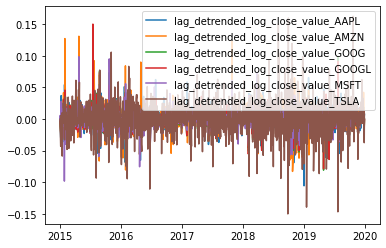

In [54]:
from data import set_datetime, detrend_ts, take_diff_ts

companyCloseValuesMetrics1519 = companyValuesMetrics1519[companyValuesMetrics1519.columns[:6]]

for col in companyCloseValuesMetrics1519.columns:
    companyCloseValuesMetrics1519[f'log_{col}'] = np.log(companyCloseValuesMetrics1519[col])
for col in companyCloseValuesMetrics1519.columns:
    companyCloseValuesMetrics1519[f'detrended_{col}'] = detrend_ts(companyCloseValuesMetrics1519[f'{col}'])

# Take differencing
lag = 1
final_ts_len = 1304
temp_lag = {}
for col in companyCloseValuesMetrics1519.columns:
    temp = np.diff(companyCloseValuesMetrics1519[col], n=lag)
    temp_lag[f"lag_{col}"] = temp
companyCloseValuesMetrics1519 = companyCloseValuesMetrics1519[-final_ts_len:]
for col in companyCloseValuesMetrics1519.columns:
    companyCloseValuesMetrics1519[f"lag_{col}"] = temp_lag[f"lag_{col}"][-final_ts_len:]

for col in companyCloseValuesMetrics1519.columns[-6:]:
    plt.plot(companyCloseValuesMetrics1519[f'{col}'], label=f'{col}')
plt.legend()

In [55]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import zivot_andrews

stationary_cols = []

for col in companyCloseValuesMetrics1519.columns:
    adf_result = adfuller(companyCloseValuesMetrics1519[col])
    print(f'{col.upper()} test:')
    print(f'ADF Statistic: {adf_result[0]}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print('\t%s: %.3f' % (key, value))
    print('p-value: %f' % adf_result[1])
    print("Non-Stationary") if adf_result[1] > 0.05 else print("Stationary")
    
    # t_stat, p_value, critical_values, _, _ = zivot_andrews(stationary_with_break[0].values)
    za_result = zivot_andrews(companyCloseValuesMetrics1519[col])
    print(f'Zivot-Andrews Statistic: {za_result[0]:.2f}')
    for key, value in za_result[2].items():
        print('Critial Values:')
        print(f'   {key}, {value:.2f}')
    print(f'\np-value: {za_result[1]:.2f}')
    print("Non-Stationary") if za_result[1] > 0.05 else print("Stationary")

    if (adf_result[1] < 0.05) & (za_result[1] < 0.05):
        stationary_cols.append(col)

len(stationary_cols)

CLOSE_VALUE_AAPL test:
ADF Statistic: 1.055651664948278
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
p-value: 0.994820
Non-Stationary
Zivot-Andrews Statistic: -1.81
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 1.00
Non-Stationary
CLOSE_VALUE_AMZN test:
ADF Statistic: -0.8407237639557726
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
p-value: 0.806866
Non-Stationary
Zivot-Andrews Statistic: -4.41
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.15
Non-Stationary
CLOSE_VALUE_GOOG test:
ADF Statistic: -0.8273347937513253
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
p-value: 0.810961
Non-Stationary
Zivot-Andrews Statistic: -4.78
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.06
Non-Stationary
CLOSE_VALUE_GOOGL test:
ADF Statistic: -0.9501535503930998
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
p-value

Zivot-Andrews Statistic: -15.37
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.00
Stationary
LAG_CLOSE_VALUE_TSLA test:
ADF Statistic: -36.199997051505676
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
p-value: 0.000000
Stationary
Zivot-Andrews Statistic: -36.30
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.00
Stationary
LAG_LOG_CLOSE_VALUE_AAPL test:
ADF Statistic: -26.561200375971357
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
p-value: 0.000000
Stationary
Zivot-Andrews Statistic: -26.72
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.00
Stationary
LAG_LOG_CLOSE_VALUE_AMZN test:
ADF Statistic: -26.384404578362705
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
p-value: 0.000000
Stationary
Zivot-Andrews Statistic: -26.50
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

28

In [56]:
stationary_cols[4:10]

['lag_close_value_AAPL',
 'lag_close_value_AMZN',
 'lag_close_value_GOOG',
 'lag_close_value_GOOGL',
 'lag_close_value_MSFT',
 'lag_close_value_TSLA']

In [57]:
companyCloseValuesMetricsFinal = companyCloseValuesMetrics1519[stationary_cols[4:10]]

companyCloseValuesMetricsFinal.head(3)

,lag_close_value_AAPL,lag_close_value_AMZN,lag_close_value_GOOG,lag_close_value_GOOGL,lag_close_value_MSFT,lag_close_value_TSLA
date,,,,,,
2015-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-02,-0.011900,-0.002362,-0.003206,-0.002229,0.007172,-0.011175
2015-01-05,-0.034906,-0.008170,-0.022058,-0.020259,-0.010063,-0.033236


### Causal Discovery - Constrained based

In [58]:
dataFrameCompanies = np.column_stack((
    companyCloseValuesMetricsFinal,
    tweetMetricsFinal))
dataFrameCompanies[:5].shape

(5, 12)

In [59]:
print(f"Columns for values: \n{companyCloseValuesMetricsFinal.columns}")
print(f"Columns for tweets: \n{tweetMetricsFinal.columns}")

Columns for values: 
Index(['lag_close_value_AAPL', 'lag_close_value_AMZN', 'lag_close_value_GOOG',
       'lag_close_value_GOOGL', 'lag_close_value_MSFT',
       'lag_close_value_TSLA'],
      dtype='object')
Columns for tweets: 
Index(['retweet_num_AAPL', 'retweet_num_AMZN', 'retweet_num_GOOG',
       'retweet_num_GOOGL', 'retweet_num_MSFT',
       'detrended_log_retweet_num_TSLA'],
      dtype='object')


#### PC

In [60]:
from pytrad.search.ConstraintBased import PC
from pytrad.utils.cit import fisherz, chisq, gsq, mv_fisherz, kci ## Conditional Independence test

cg = PC.pc(data=dataFrameCompanies, alpha=0.05, indep_test=gsq, 
            stable=True, uc_rule=0, uc_priority=-1)

0 ind 1 | () with p-value 1.000000

0 ind 2 | () with p-value 1.000000

0 ind 3 | () with p-value 1.000000

0 ind 4 | () with p-value 1.000000

0 ind 5 | () with p-value 1.000000

0 ind 6 | () with p-value 1.000000

0 ind 7 | () with p-value 1.000000

0 ind 8 | () with p-value 1.000000

0 ind 9 | () with p-value 1.000000

0 ind 10 | () with p-value 1.000000

0 ind 11 | () with p-value 1.000000

1 ind 0 | () with p-value 1.000000

1 ind 2 | () with p-value 1.000000

1 ind 3 | () with p-value 1.000000

1 ind 4 | () with p-value 1.000000

1 ind 5 | () with p-value 1.000000

1 ind 6 | () with p-value 1.000000

1 ind 7 | () with p-value 1.000000

1 ind 8 | () with p-value 1.000000

1 ind 9 | () with p-value 1.000000

1 ind 10 | () with p-value 1.000000

1 ind 11 | () with p-value 1.000000

2 ind 0 | () with p-value 1.000000

2 ind 1 | () with p-value 1.000000

2 ind 3 | () with p-value 1.000000

2 ind 4 | () with p-value 1.000000

2 ind 5 | () with p-value 1.000000

2 ind 6 | () with p-valu

#### FCI

In [ ]:
from pytrad.search.ConstraintBased.FCI import fci, mod_endpoint
from pytrad.utils.GraphUtils import GraphUtils
from pytrad.utils.cit import fisherz, chisq, gsq, mv_fisherz, kci ## Conditional Independence test

G = fci(dataFrameCompanies, fisherz, 0.05, verbose=True)

pgv_g = GraphUtils.to_pgv(G)
pgv_g.draw('./FCI/all_companies_test.jpeg', prog='dot', format='jpeg')

## GES


In [64]:
## GES

from pytrad.search.ScoreBased.GES import ges
from pytrad.score.LocalScoreFunction import local_score_cv_multi
# score = local_score_cv_multi(Data, Xi, PAi, parameters)
Record = ges(dataFrameCompanies, 'local_score_CV_general', 3, {'kfold': 10, 'lambda': 0.01})


pgv_g = GraphUtils.to_pgv(Record['G'])
pgv_g.draw('./FCI/ges_all.jpeg', prog='dot', format='jpeg')

x0
x1
x2
x3
x4
x5
x6
x7
x8
x9
x10
x11
x0
x1
x2
x3
x4
x5
x6
x7
x8
x9
x10
x11
x0
x1
x2
x3
x4
x5
x6
x7
x8
x9
x10
x11
x2
x3
x0
x1
x2
x3
x4
x5
x6
x7
x8
x9
x10
x11
x1
x0
x1
x2
x3
x4
x5
x6
x7
x8
x9
x10
x11
x0
x1
x0
x1
x2
x3
x4
x5
x6
x7
x8
x9
x10
x11
x0
x1
x0
x1
x2
x3
x4
x5
x6
x7
x8
x9
x10
x11
x0
x1
x0
x1
x2
x3
x4
x5
x6
x7
x8
x9
x10
x11
x0
x1
x8
x0
x1
x2
x3
x4
x5
x6
x7
x8
x9
x10
x11
x0
x1
x8
x0
x1
x2
x3
x4
x5
x6
x7
x8
x9
x10
x11
x0
x1
x2
x3
x4
x8
x0
x1
x2
x4
x0
x1
x0
x1
x2
x3
x4
x5
x6
x7
x8
x9
x10
x11
x0
x1
x7
x8
x9
x10
x8
x0
x1
x2
x3
x4
x5
x6
x7
x8
x9
x10
x11
x0
x1
x2
x3
x4
x5
x7
x8
x9
x10
x0
x1
x2
x3
x4
x7
x8
x9
x10
x0
x1
x2
x4
x7
x8
x9
x10
x0
x1
x7
x8
x9
x10
x8
x0
x1
x2
x3
x4
x5
x6
x7
x8
x9
x10
x11
x0
x1
x7
x8
x9
x10
x8
x0
x1
x2
x3
x4
x5
x6
x7
x8
x9
x10
x11
x0
x1
x7
x8
x9
x10
x8
x0
x1
x2
x3
x4
x5
x6
x7
x8
x9
x10
x11
x0
x1
x7
x8
x9
x10
x8
x0
x1
x2
x3
x4
x5
x6
x7
x8
x9
x10
x11
x0
x1
x7
x8
x9
x10
x8
x0
x1
x2
x3
x4
x5
x6
x7
x8
x9
x10
x11
x0
x1
x6
x7
x8
x9
x10
x8
x9
x8
x0
x1
x2
x3
x4
x5
x6
x7
x8